In [76]:
import numpy as np
import matplotlib.pyplot as plt
from skbio.stats.composition import alr, alr_inv
from sim import sim1, sim1_truth, sim2
from util import default_ternary_labels, default_barplot
import ternary

np.random.seed(0)
%matplotlib inline

# Modeling Differential Abundance

In [2]:
x, y = sim1()

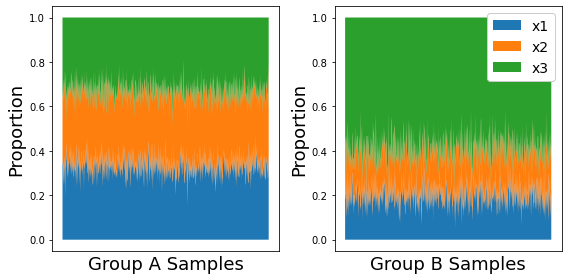

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
t = np.arange(np.sum(y==0))
ax[0] = default_barplot(ax[0], x[y], t, ticks=False)
ax[0].set_xlabel('Group A Samples', fontsize=18)
ax[1] = default_barplot(ax[1], x[~y], t, ticks=False)
ax[1].set_xlabel('Group B Samples', fontsize=18)
plt.legend(framealpha=1, fontsize=14)
plt.tight_layout()

In [77]:
x, y = sim1_truth()

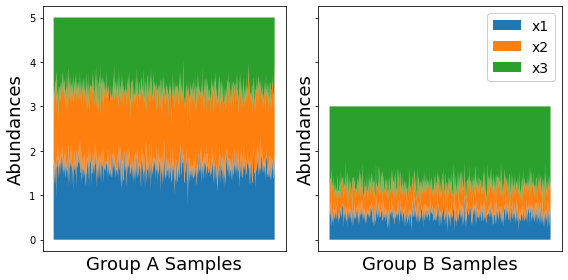

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
t = np.arange(np.sum(y==0))
ax[0] = default_barplot(ax[0], x[y], t, ticks=False)
ax[0].set_xlabel('Group A Samples', fontsize=18)
ax[0].set_ylabel('Abundances')
ax[1] = default_barplot(ax[1], x[~y], t, ticks=False)
ax[1].set_xlabel('Group B Samples', fontsize=18)
ax[1].set_ylabel('Abundances')
plt.legend(framealpha=1, fontsize=14)
plt.tight_layout()

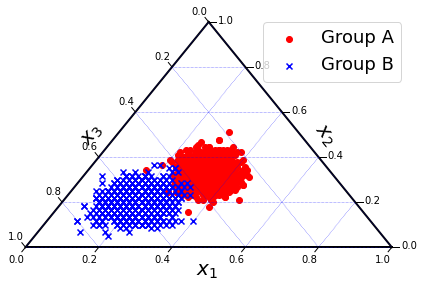

In [5]:
## Boundary and Gridlines
scale = 1
figure, tax = ternary.figure(scale=scale)
tax = default_ternary_labels(tax)
tax.scatter(x[y, :], marker='o', color='r', label="Group A")
tax.scatter(x[~y, :], marker='x', color='b', label="Group B")

plt.axis('off')
plt.tight_layout()
plt.legend(fontsize=18)

Text(0, 0.5, '$log(x_3/x_1)$')

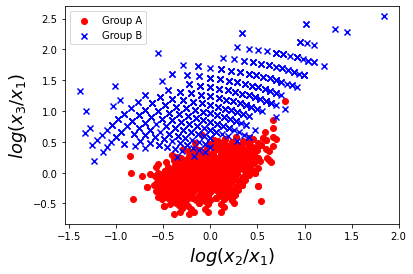

In [6]:
alrx = alr(x)

fig, ax = plt.subplots()

ax.scatter(alrx[y, 0], alrx[y, 1], marker='o', color='r', label="Group A")
ax.scatter(alrx[~y, 0], alrx[~y, 1], marker='x', color='b', label="Group B")
ax.legend(loc=2)
ax.set_xlabel('$log(x_2/x_1)$', fontsize=18)
ax.set_ylabel('$log(x_3/x_1)$', fontsize=18)

In [7]:
from statsmodels.multivariate.manova import MANOVA
model = MANOVA(x, y).mv_test()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
=================================================================
                                                                 
-----------------------------------------------------------------
           x0            Value  Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0798 3.0000 1997.0000 7681.0246 0.0000
         Pillai's trace  0.9202 3.0000 1997.0000 7681.0246 0.0000
 Hotelling-Lawley trace 11.5388 3.0000 1997.0000 7681.0246 0.0000
    Roy's greatest root 11.5388 3.0000 1997.0000 7681.0246 0.0000
=================================================================

"""

Ttest_indResult(statistic=58.08899441108222, pvalue=0.0)

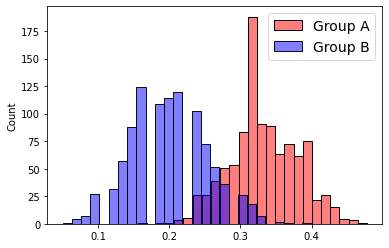

In [8]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.histplot(x[y, 0], label='Group A', color='r', alpha=0.5)
sns.histplot(x[~y, 0], label='Group B', color='b', alpha=0.5)
plt.legend(fontsize=14)
ttest_ind(x[y, 0], x[~y, 0])

Ttest_indResult(statistic=57.79040191823743, pvalue=0.0)

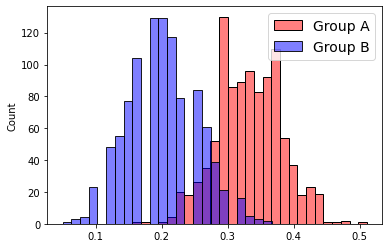

In [9]:
sns.histplot(x[y, 1], label='Group A', color='r', alpha=0.5)
sns.histplot(x[~y, 1], label='Group B', color='b', alpha=0.5)
plt.legend(fontsize=14)
ttest_ind(x[y, 1], x[~y, 1])

# TODO: Need to provide some counter examples how things can go horribly wrong
- And provide some more math here as well

In [11]:
x, t = sim2() 

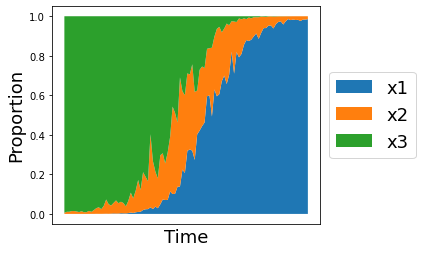

In [12]:
fig, ax = plt.subplots()
ax = default_barplot(ax, x, t, ticks=False)
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

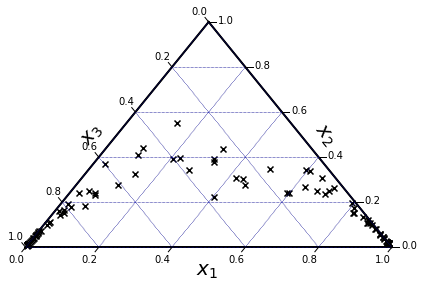

In [13]:
figure, tax = ternary.figure(scale=1.0)
tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax = default_ternary_labels(tax)

tax.scatter(x, marker='x', color='black', label="Red Squares")

plt.axis('off')
plt.tight_layout()

In [18]:
alrx = alr(x)

Text(0, 0.5, '$log(x_2/x_3)$')

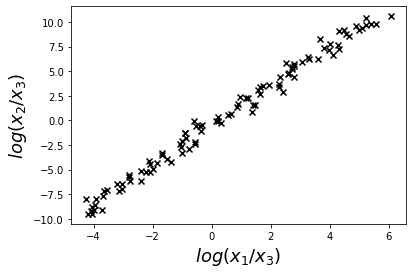

In [19]:
plt.scatter(alrx[:, 0], alrx[:, 1], marker='x', c='k')
plt.xlabel('$log(x_1/x_3)$', fontsize=18)
plt.ylabel('$log(x_2/x_3)$', fontsize=18)

In [68]:
from scipy.stats import linregress
def ols(x, y):
    slope, inter = [], []
    for i in range(x.shape[1]):
        res = linregress(x[:, i], y)
        slope.append(res.slope)
        inter.append(res.intercept)
    return np.hstack(slope[::-1]).reshape(-1, 1), np.hstack(inter[::-1]).reshape(-1, 1)
    
slope, intercept = ols(alrx, t)

In [69]:
alrx_pred = (intercept + slope * t).T

Text(0, 0.5, '$log(x_2/x_3)$')

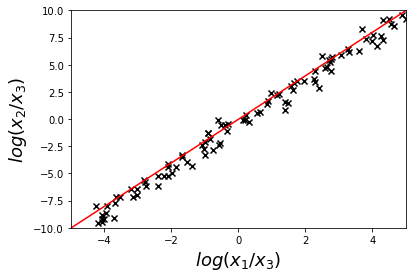

In [72]:
plt.scatter(alrx[:, 0], alrx[:, 1], marker='x', c='k')
plt.plot(alrx_pred[:, 0], alrx_pred[:, 1], c='r')
plt.xlim([-5, 5])
plt.ylim([-10, 10])

plt.xlabel('$log(x_1/x_3)$', fontsize=18)
plt.ylabel('$log(x_2/x_3)$', fontsize=18)

In [73]:
x_pred = alr_inv(alrx_pred)

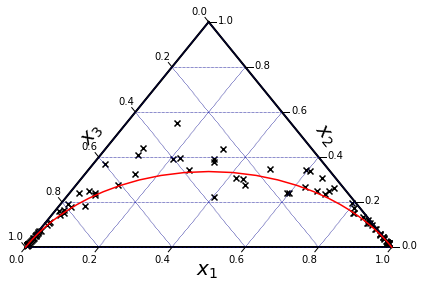

In [74]:
figure, tax = ternary.figure(scale=1.0)
tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax = default_ternary_labels(tax)

tax.scatter(x, marker='x', color='black', label="Red Squares")
tax.plot(x_pred, color='red', label="Red Squares")

plt.axis('off')
plt.tight_layout()

# TODO: Need to flesh out connection between growth curves and ALR transform
    - This all needs some more math